In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, classification_report
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBRFClassifier

print(f'{np}',np.__version__)
print(f'{pd}',pd.__version__)
print(f'{sns}',sns.__version__)

<module 'numpy' from 'E:\\anaconda3\\envs\\MachineLearning\\lib\\site-packages\\numpy\\__init__.py'> 1.22.3
<module 'pandas' from 'E:\\anaconda3\\envs\\MachineLearning\\lib\\site-packages\\pandas\\__init__.py'> 1.4.2
<module 'seaborn' from 'E:\\anaconda3\\envs\\MachineLearning\\lib\\site-packages\\seaborn\\__init__.py'> 0.11.2


E:\anaconda3\envs\MachineLearning\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### Data source: https://www.kaggle.com/datasets/vardhansiramdasu/fraudulent-transactions-prediction

In [2]:
# read the data
df = pd.read_csv(r'C:\Users\abedw\DataBases\Fraud.csv') # 470MB of data
df.shape

(6362620, 11)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#np.set_printoptions(edgeitems=3)
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [7]:
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{}  - {}%'.format(col, missing))

step  - 0.0%
type  - 0.0%
amount  - 0.0%
nameOrig  - 0.0%
oldbalanceOrg  - 0.0%
newbalanceOrig  - 0.0%
nameDest  - 0.0%
oldbalanceDest  - 0.0%
newbalanceDest  - 0.0%
isFraud  - 0.0%
isFlaggedFraud  - 0.0%


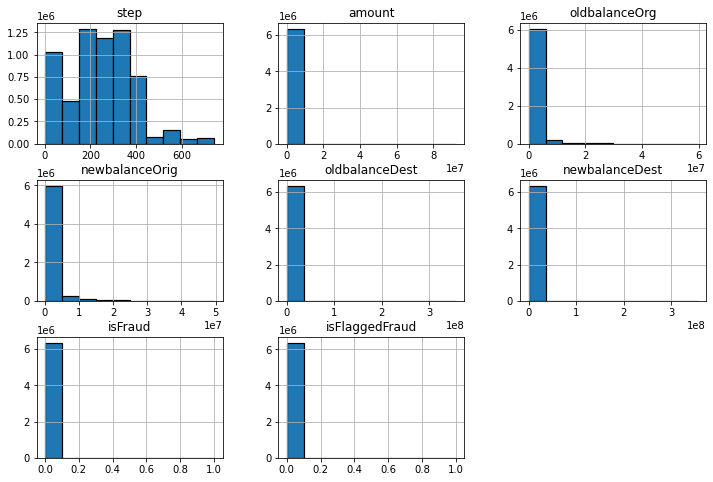

In [8]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));
plt.show();

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=data,x='type',hue='isFraud')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('Type Vs isFraud')
plt.show()

In [32]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

## From 6.3 million past transactions we have 8213 transactions that are fraud

In [33]:
df.type = pd.Categorical(df.type)

In [34]:
df['type'] = df.type.cat.codes

In [35]:
df.nameOrig = pd.Categorical(df.nameOrig)

In [36]:
df['nameOrig'] = df.nameOrig.cat.codes

In [37]:
df.nameDest = pd.Categorical(df.nameDest)

In [38]:
df['nameDest'] = df.nameDest.cat.codes

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int8   
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(2), int64(3), int8(1)
memory usage: 443.0 MB


In [40]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [41]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [43]:
X_train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
3428125,256,1,67618.08,5474045,0.0,0.00,221990,853476.15,921094.23,0
5362081,375,1,177845.82,4341132,130102.0,0.00,557151,0.00,177845.82,0
1055047,96,3,22866.43,1977798,0.0,0.00,1282102,0.00,0.00,0
4041924,299,1,232692.06,6113863,38816.0,0.00,398158,0.00,232692.06,0
5128527,356,3,12689.07,168965,142280.9,129591.83,2546321,0.00,0.00,0


In [47]:
%%time
np.random.seed(0)

clf = XGBRFClassifier(n_jobs=-1)
clf.fit(X_train,y_train);

[22:28:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 38min 45s
Wall time: 2min 6s


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=-1,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='approx', validate_parameters=1,
                verbosity=None)

In [48]:
test_preds = clf.predict(X_test)
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906279
           1       0.98      0.66      0.79      2507

    accuracy                           1.00   1908786
   macro avg       0.99      0.83      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786



In [50]:
%%time
clf_rf = RandomForestClassifier(n_jobs=-1, random_state=0)

clf_rf.fit(X_train,y_train)
test_preds = clf_rf.predict(X_test)
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906279
           1       0.98      0.78      0.87      2507

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

CPU times: total: 56min 4s
Wall time: 2min 39s


In [51]:
%%time
clf_etc = ExtraTreesClassifier(n_jobs=-1,random_state=0)

clf_etc.fit(X_train,y_train)
clf_etc_preds = clf_etc.predict(X_test)
print(classification_report(y_test,clf_etc_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906279
           1       1.00      0.70      0.82      2507

    accuracy                           1.00   1908786
   macro avg       1.00      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

CPU times: total: 31min 46s
Wall time: 1min 30s


In [53]:
print(clf_rf.feature_importances_),
clf_etc.feature_importances_

[0.08635553 0.07050338 0.14484184 0.02584428 0.26052206 0.02437866
 0.02677586 0.06642529 0.29352133 0.00083176]


array([0.1296062 , 0.03119026, 0.1856181 , 0.04515733, 0.27315586,
       0.05891543, 0.04649563, 0.05836041, 0.16963987, 0.00186091])

## the newbalanceOrg is the most important feature as the model has learned because fraud transactions usually empty balance and cash everything out

In [54]:
%%time
clf_lr = LogisticRegression(n_jobs=-1,random_state=0)

clf_lr.fit(X_train,y_train)
clf_lr_preds = clf_lr.predict(X_test)
print(classification_report(y_test,clf_lr_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906279
           1       0.79      0.44      0.56      2507

    accuracy                           1.00   1908786
   macro avg       0.89      0.72      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786

CPU times: total: 1.69 s
Wall time: 1min 2s


In [55]:
%%time
clf_ada = AdaBoostClassifier(random_state=0)

clf_ada.fit(X_train,y_train)
clf_ada_preds = clf_ada.predict(X_test)
print(classification_report(y_test,clf_ada_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906279
           1       0.92      0.60      0.73      2507

    accuracy                           1.00   1908786
   macro avg       0.96      0.80      0.86   1908786
weighted avg       1.00      1.00      1.00   1908786

CPU times: total: 4min 31s
Wall time: 4min 39s


In [56]:
%%time
clf_sgd = SGDClassifier(n_jobs=-1, random_state=0)

clf_sgd.fit(X_train,y_train)
clf_sgd_preds = clf_sgd.predict(X_test)
print(classification_report(y_test,clf_sgd_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906279
           1       0.73      0.56      0.63      2507

    accuracy                           1.00   1908786
   macro avg       0.87      0.78      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786

CPU times: total: 28.5 s
Wall time: 29.5 s


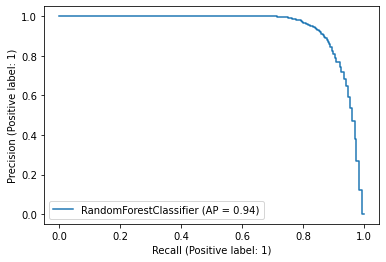

In [57]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(clf_rf, X_test, y_test);

In [66]:
GRID = {"n_estimators": [80,60,40],
       "criterion": ["gini", "entropy"]}

In [67]:
%%time
clf_rf_gs = GridSearchCV(clf_rf, GRID, scoring='recall', cv=5, verbose=3)

clf_rf_gs.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...criterion=gini, n_estimators=80;, score=0.790 total time= 1.6min
[CV 2/5] END ...criterion=gini, n_estimators=80;, score=0.775 total time= 1.4min
[CV 3/5] END ...criterion=gini, n_estimators=80;, score=0.748 total time= 1.4min
[CV 4/5] END ...criterion=gini, n_estimators=80;, score=0.763 total time= 1.5min
[CV 5/5] END ...criterion=gini, n_estimators=80;, score=0.780 total time= 1.5min
[CV 1/5] END ...criterion=gini, n_estimators=60;, score=0.791 total time= 1.1min
[CV 2/5] END ...criterion=gini, n_estimators=60;, score=0.771 total time= 1.1min
[CV 3/5] END ...criterion=gini, n_estimators=60;, score=0.748 total time= 1.1min
[CV 4/5] END ...criterion=gini, n_estimators=60;, score=0.764 total time= 1.1min
[CV 5/5] END ...criterion=gini, n_estimators=60;, score=0.780 total time= 1.1min
[CV 1/5] END ...criterion=gini, n_estimators=40;, score=0.789 total time=  46.0s
[CV 2/5] END ...criterion=gini, n_estimators=40;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [80, 60, 40]},
             scoring='recall', verbose=3)

In [68]:
clf_rf_gs.best_params_

{'criterion': 'gini', 'n_estimators': 80}